# Context:
An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

# Objective:     
Perform statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language?
5. Is the mean time spent on the new page same for the different language users?

Note: significance level of 0.05 is considered for all tests

# Data Dictionary:
1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

### Import the necessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Read the dataset

In [2]:
df = pd.read_csv("abtest.csv")

### View the first and last 5 rows of the dataset.

In [3]:
df.head() # displays the first five rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,yes,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail() # displays the last five rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


### Checking the shape and data types of the columns for the dataset

In [5]:
df.shape

(100, 6)

* The dataset has 180 rows and 9 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Fixing the data types
* group, landing_page, converted and language_preferred are of object type, we can change them to category.

`coverting "objects" to "category" reduces the data space required to store the dataframe`

In [7]:
df["group"]=df["group"].astype("category")
df["landing_page"]=df["landing_page"].astype("category")
df["converted"]=df["converted"].astype("category")
df["language_preferred"]=df["language_preferred"].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB


* group, landing_page, converted and language_preferred have been converted to categories

`we can see that the memory usage has decreased from 4.8+ KB to 2.5 KB`

### Statistical summary for the dataset.

In [9]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


* time_spent_on_the_page has approximately same mean and median.

In [10]:
df.describe(include=["category"])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,treatment,old,yes,Spanish
freq,50,50,55,34


* group and landing_page categories are equally divided.
* converted (55) represent more users got converted to the enews.
* language_preferred has 3 unique categories which indicates there are 3 languages.

### Checking for Missing Values

In [11]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There are no missing values in the data.

## 1. Exploratory Data Analysis

In [12]:
# Writing a function to help create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(12,7), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, figsize = figsize, 
                                           gridspec_kw = {"height_ratios": (.25, .75)})
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

### Observations on time spent on the page

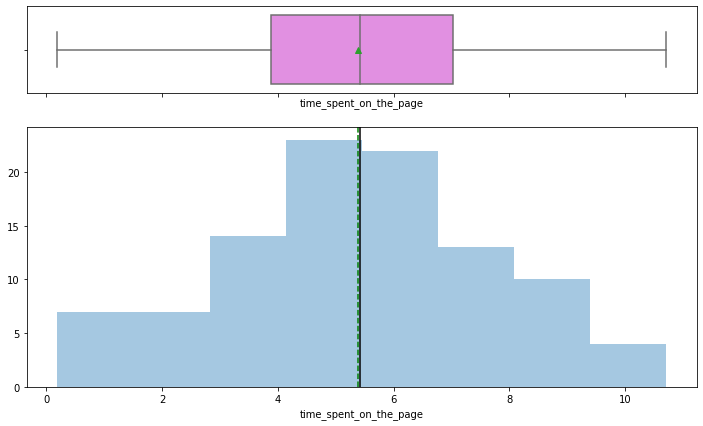

In [13]:
histogram_boxplot(df["time_spent_on_the_page"])

* Mean time spent on the page by users is 5.37
* There are no outliers present in the data.

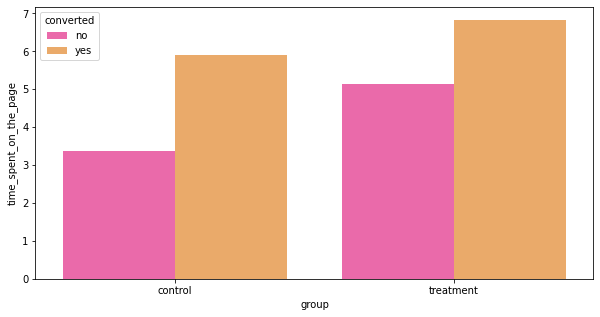

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='group', y='time_spent_on_the_page', hue='converted', palette='spring', ci=None)
plt.show()

* Converted users in both groups spend more time on the landing page.

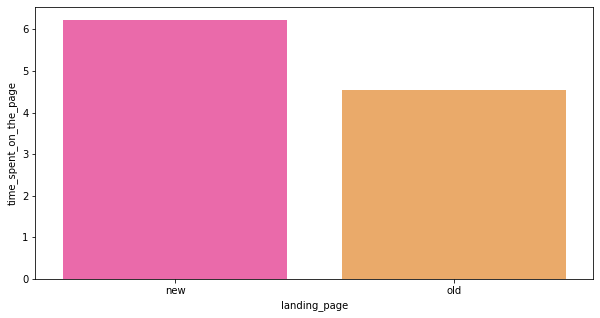

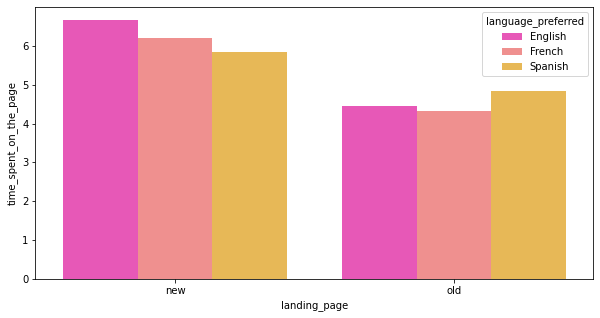

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='landing_page', y='time_spent_on_the_page', palette='spring', ci=None)
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='landing_page', y='time_spent_on_the_page', palette='spring', 
            hue=df["language_preferred"],  ci=None)
plt.show()

* Users who land on the new page spends more time on the page than users who land on the old page.
* Users with English as preferred language spend the most time on the new page and users with Spanish as preferred language spend the most time on the old page.

### Observations on converted

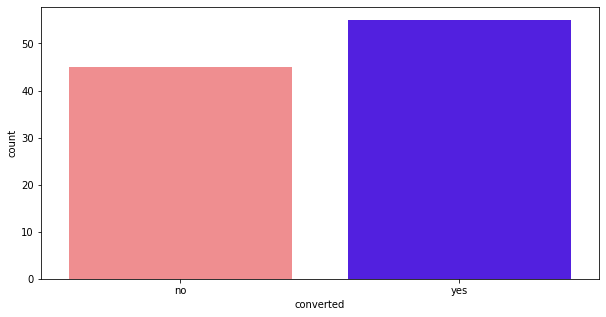

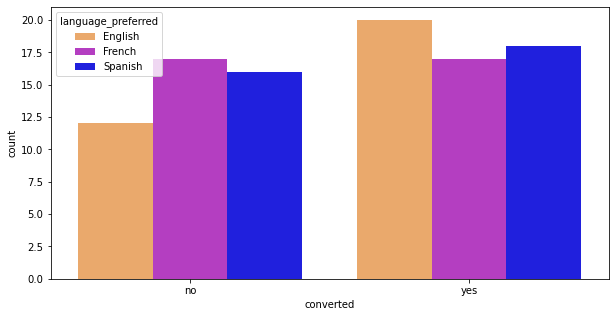

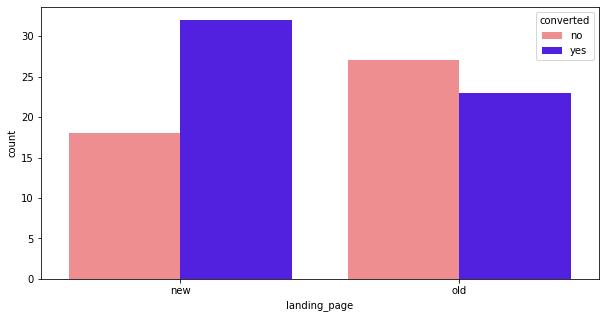

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(df["converted"], palette='gnuplot2_r');
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(df["converted"], hue=df["language_preferred"], palette='gnuplot2_r');
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(df["landing_page"], hue=df['converted'], palette='gnuplot2_r');

* In general, there are more converted users.
* Users who prefer to view in English have the highest rate of converted users.
* Users who prefer to view in French have the highest rate of non-converted users.
* Conversion rate for the new page is greater than the conversion rate for the old page

### Observations on language preferred

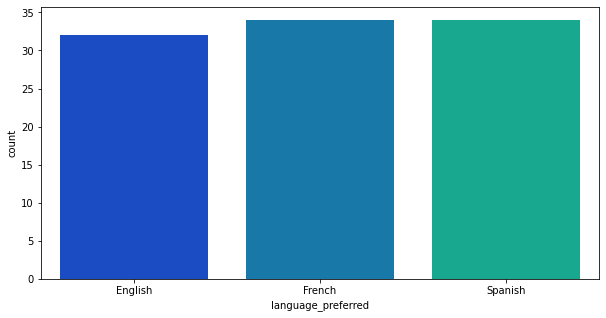

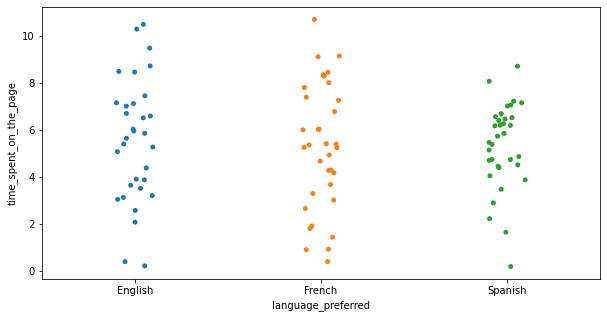

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df["language_preferred"], palette='winter');
plt.show()
plt.figure(figsize=(10,5))
sns.stripplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.show()

* Lesser users prefer to view the landing page in English compared to users that prefer viewing in French and Spanish.
* Users who prefer to view in Spanish spend lesser time on the landing page compared to the other preferred languages.

## 2. Do the users spend more time on the new landing page than the old landing page?

Hypothesis Formulation;

Using the two independent sample t-test

* $H_0: \mu_{new} = \mu_{old}$ (Users don't spend more time on the new landing page)

* $H_a: \mu_{new} > \mu_{old}$ (Users spend more time on the new landing page)

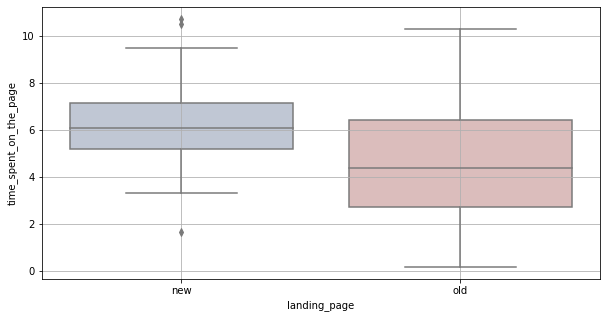

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x="landing_page", y="time_spent_on_the_page", data=df, palette='vlag')
plt.grid()
plt.show()

In [19]:
# Perform two independent sample t-test

from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(df.loc[df['landing_page'] == 'new', 'time_spent_on_the_page'],
                              df.loc[df['landing_page'] == 'old', 'time_spent_on_the_page'], alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001316123528095005


Since the p value is lesser than α (0.05), we REJECT the Null Hypothesis. Hence, we have enough statistical significance to conclude that users spend more time on the new landing page than the old landing page.

## 3. Is the conversion rate for the new page greater than the conversion rate for the old page?

Hypothesis Formulation;

Using the two independent sample t-test

* $H_0: \mu_{new} = \mu_{old}$ (Conversion rate for the new page equals the conversion rate for the old page)

* $H_a: \mu_{new} > \mu_{old}$ (Conversion rate for the new page is greater than the conversion rate for the old page)

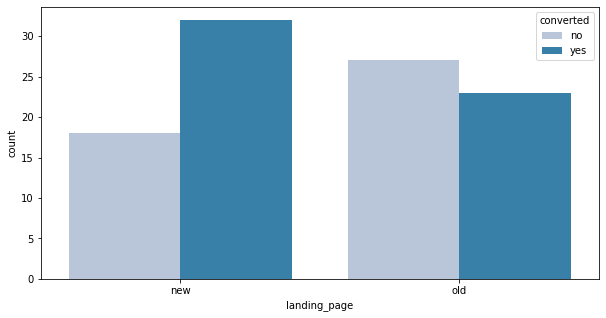

In [20]:
plt.figure(figsize=(10,5))

sns.countplot(df["landing_page"], hue=df['converted'], palette='PuBu');

In [21]:
# Perform two independent sample t-test

df_new = df.loc[df['landing_page'] == 'new', 'converted'][df['converted']=='yes'].value_counts()
df_old = df.loc[df['landing_page'] == 'old', 'converted'][df['converted']=='yes'].value_counts()

test_stat, p_value = ttest_ind(df_new, df_old, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.4202884081666445


Since the p value is greater than α (0.05), we fail to reject the null hypothesis. Hence, we don't have enough statistical significance to conclude that the conversion rate for the new page is greater than the conversion rate for the old page.

## 4. Does the converted status depend on the preferred language?

### Null and Alternative Hypothesis

We will test the null hypothesis

$H_0:$ Converted status is independent of preferred language.

against the alternate hypothesis

$H_a:$ Converted status depends on the preferred language.

In [22]:
# Creating a contingency table

contingency=pd.crosstab(df.converted, df.language_preferred) 
print(contingency)

language_preferred  English  French  Spanish
converted                                   
no                       12      17       16
yes                      20      17       18


In [23]:
# Import the required function
from scipy.stats import chi2_contingency

# Find the p_value
chi, p_value, dof, expected = chi2_contingency(contingency)
print('The p-value is', p_value)

The p-value is 0.5686624745121615


As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence, we do have enough statistical significance to conclude that converted status is independent of preferred language at 5% significance level.

## 5. Is the mean time spent on the new page same for the different language users?

Hypothesis Formulation;

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the mean time spent on the new page of English, French and Spanish, respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least the mean time spent on the new page for a language is different from the rest.


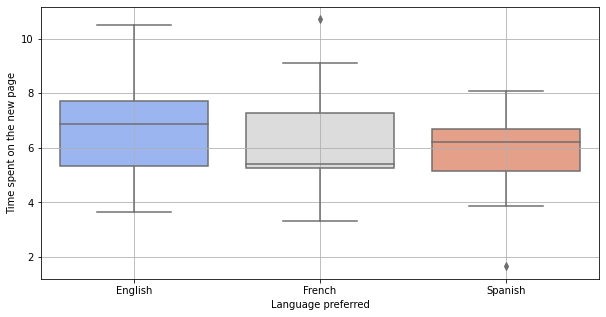

In [24]:
plt.figure(figsize=(10,5))

sns.boxplot(x = df.loc[df['landing_page'] == 'new', 'language_preferred'], 
            y = df.loc[df['landing_page'] == 'new', 'time_spent_on_the_page'], palette='coolwarm')

plt.xlabel('Language preferred')
plt.ylabel('Time spent on the new page')
plt.grid()
plt.show()

In [25]:
# perform one-way anova test

mean_time_english = df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'][df['landing_page']=='new']
mean_time_french = df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'][df['landing_page']=='new']
mean_time_spanish = df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'][df['landing_page']=='new']


test_stat, p_value = stats.f_oneway(mean_time_english, mean_time_french, mean_time_spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Insight
As the p-value is greater than the significance level (0.05), we fail to reject the null hypothesis. Hence, we have enough statistical significance to conclude that the means of the time spent on the new page is same for the different language users.

## Conclusion

* Users who got converted in both groups spend more time one the page
* The treatment group landing on the new page spend more time on the page compared to the control group.
* Users with English as preferred language spend the most time on the new page and users with Spanish as preferred language spend the most time on the old page.
* Conversion rate for the new page is greater than the conversion rate for the old page.
* Users with English as preferred language have the highest conversion rate.



## Recommendation

* The company should utilize the new landing page more as it proves its effectiveness in gathering new subscribers  because users who landed on the new page spend more time on the page and it has an higher conversion rate.
* The company needs to engage in more new features on the new landing page to attract more users to get converted.